# WearAQ - Hackair
## Visualization and Analysis

In [312]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn; seaborn.set()
import os 
import pylab

## Brussels

In Brussels we had 2 sets of data. One from the participants - which we aggregated over all locations and times - and data from the airbeam. We want to see the correlation, if any, to the different variables that are there.

First read in the airbeam data

In [313]:
filenames = os.listdir('brussels_data/airbeam_data/')

In [314]:
filenames[1]

'Brussels - Humidity.csv'

In [315]:
for i in range(len(filenames)):
    filenames[i] = "brussels_data/airbeam_data/" + filenames[i]

In [316]:
data = [pd.read_csv(filename, header = 2) for filename in filenames]

In [317]:
for i in range(len(filenames)):
    data[i]["Timestamp"] = pd.to_datetime(data[i].Timestamp)

In [318]:
data[1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2246 entries, 0 to 2245
Data columns (total 4 columns):
Timestamp    2246 non-null datetime64[ns]
geo:lat      2246 non-null float64
geo:long     2246 non-null float64
Value        2246 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 70.3 KB


In [319]:
data_temp = data[0]

data_temp["Timestamp"].min()
data_temp["Timestamp"].max()

x = np.linspace(0, len(data_temp), len(data_temp))


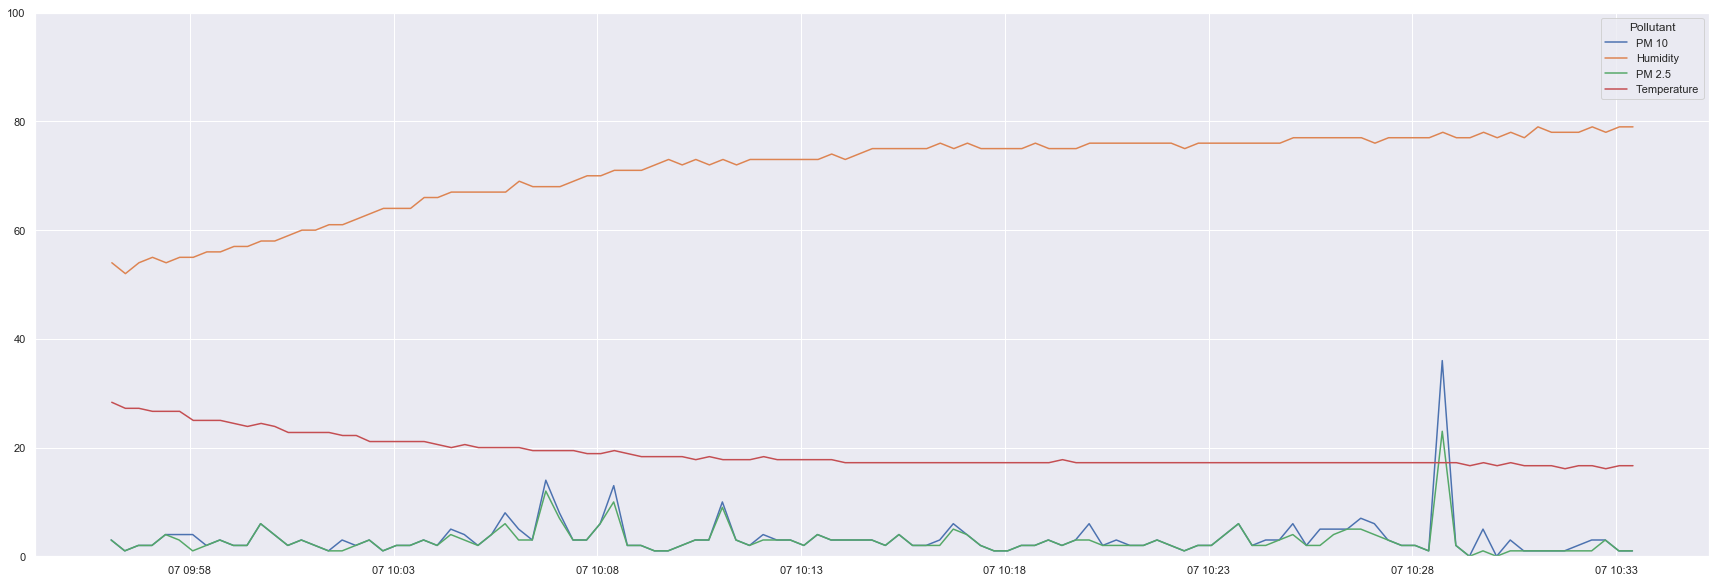

In [324]:
plt.plot(data[0].Timestamp[::20],data[0].Value[::20], label = "PM 10")
plt.plot(data[1].Timestamp[::20],data[1].Value[::20], label = "Humidity")
plt.plot(data[2].Timestamp[::20],data[2].Value[::20], label = "PM 2.5")
plt.plot(data[4].Timestamp[::20],((data[4].Value[::20]-32)*5)/9, label = "Temperature")
plt.legend(title="Pollutant", loc="upper right")
plt.yscale('linear')
axes = plt.gca()
axes.set_ylim([0,100])
plt.rcParams['figure.figsize'] = [30, 10]
plt.show()

Now lets take a look at the data that we cleaned up from the participants

In [284]:
all_data = pd.read_csv('brussels_data/brussels_alldevices.csv')

In [285]:
all_data["Timestamp"] = pd.to_datetime(all_data['Timestamp'], format = '%y-%m-%d %H:%M')

In [286]:
all_data = all_data.drop([0])
all_data

,Unnamed: 0,Location,geo:long,Timestamp,geo:lat,Perception
1,1,1,4.351949,2018-12-07 09:58:00,50.841174,3.000000
2,2,2,4.351119,2018-12-07 10:01:00,50.842156,3.714286
3,3,3,4.356241,2018-12-07 10:13:00,50.839691,4.000000
4,4,4,4.353787,2018-12-07 10:18:00,50.841253,4.142857
5,5,5,4.353783,2018-12-07 10:21:00,50.839362,4.142857
6,6,6,4.355074,2018-12-07 10:24:00,50.840463,4.500000


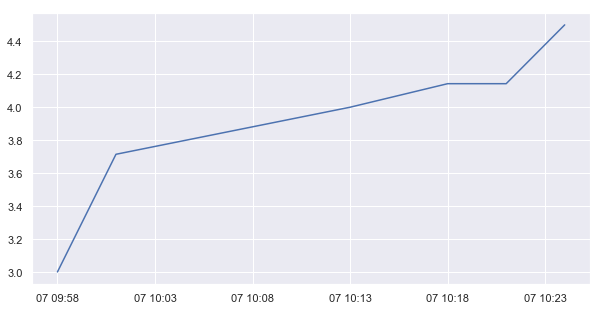

In [288]:
plt.plot(all_data['Timestamp'],all_data['Perception'])
plt.rcParams['figure.figsize'] = [10, 5]



Now lets plot them over one another to see the changes

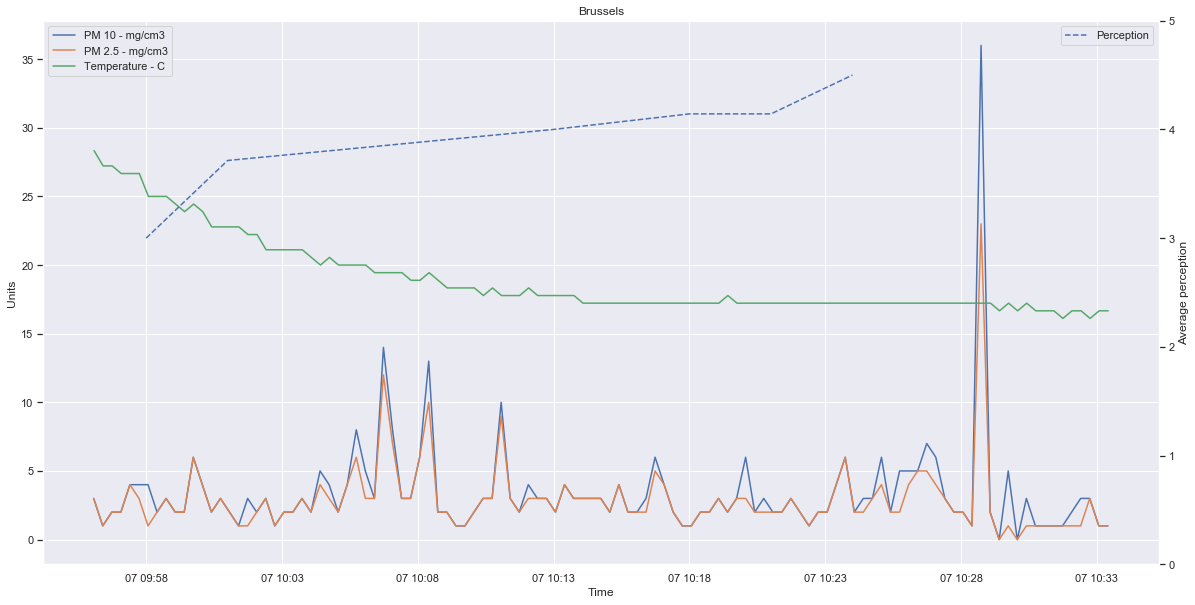

In [290]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax2.grid(False)
ax1.plot(data[0].Timestamp[::20],data[0].Value[::20], label = "PM 10 - mg/cm3")
ax1.plot(data[2].Timestamp[::20],data[2].Value[::20], label = "PM 2.5 - mg/cm3")
ax1.plot(data[4].Timestamp[::20],((data[4].Value[::20]-32)*5)/9, label = "Temperature - C")
ax2.plot(all_data['Timestamp'],all_data['Perception'], label = 'Perception', linestyle = '--')
ax1.set_xlabel('Time')
ax1.set_ylabel('Units')
ax2.set_ylabel('Average perception')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.rcParams['figure.figsize'] = [20, 10]
plt.ylim(0,5)
plt.title("Brussels")
pylab.savefig('brussels.png', dpi=200 , bbox_inches = 'tight')

## Brussels - Unesco

We need to replicate the process for this over the other workshops

In [291]:
filenames = os.listdir('brussels_unesco_data/airbeam_data/')

for i in range(len(filenames)):
    filenames[i] = "brussels_unesco_data/airbeam_data/" + filenames[i]
    
data = [pd.read_csv(filename, header = 2) for filename in filenames]

for i in range(len(filenames)):
    data[i]["Timestamp"] = pd.to_datetime(data[i].Timestamp)

In [292]:
filenames

['brussels_unesco_data/airbeam_data/Brussels_UNESCO - PM10.csv',
 'brussels_unesco_data/airbeam_data/Brussels_UNESCO - PM1.csv',
 'brussels_unesco_data/airbeam_data/Brussels_UNESCO - Temperature.csv',
 'brussels_unesco_data/airbeam_data/Brussels_UNESCO - PM2.5.csv',
 'brussels_unesco_data/airbeam_data/Brussels_UNESCO - Humidity.csv']

In [293]:
data_temp = data[0]

data_temp["Timestamp"].min()
data_temp["Timestamp"].max()

x = np.linspace(0, len(data_temp), len(data_temp))

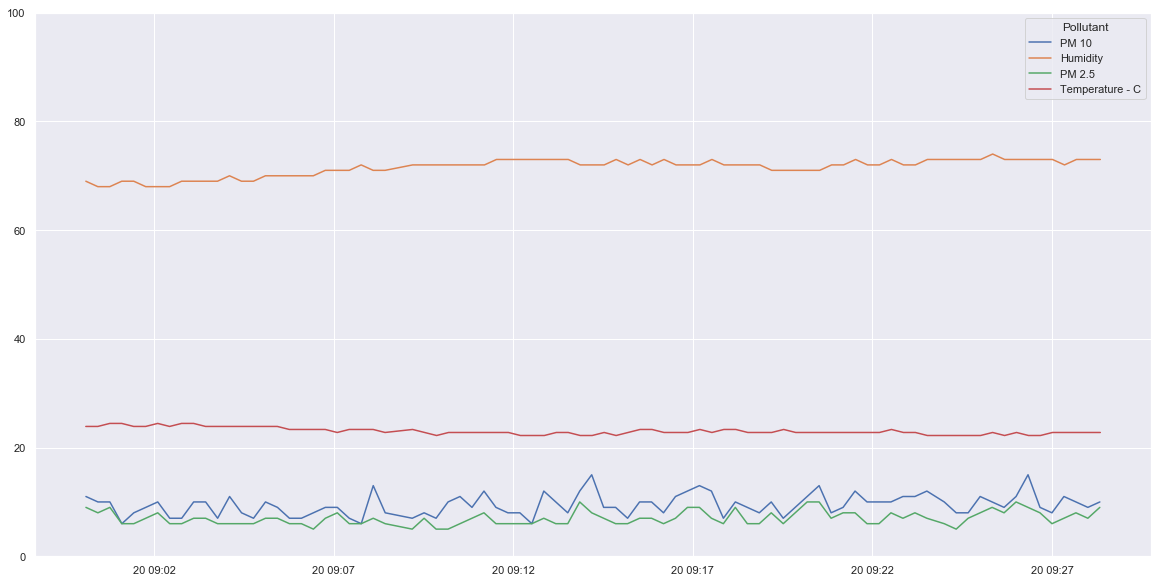

In [294]:
plt.plot(data[0].Timestamp[::20],data[0].Value[::20], label = "PM 10")
plt.plot(data[4].Timestamp[::20],data[4].Value[::20], label = "Humidity")
plt.plot(data[3].Timestamp[::20],data[3].Value[::20], label = "PM 2.5")
plt.plot(data[2].Timestamp[::20],((data[2].Value[::20]-32)*5)/9, label = "Temperature - C")
plt.legend(title="Pollutant", loc="upper right")
plt.yscale('linear')
axes = plt.gca()
axes.set_ylim([0,100])
plt.rcParams['figure.figsize'] = [10, 30]
plt.show()
pylab.savefig('example.png', dpi=200 , bbox_inches = 'tight')

In [295]:
all_data = pd.read_csv('brussels_unesco_data/brussels_unesco_alldevices.csv')
all_data["Timestamp"] = pd.to_datetime(all_data['Timestamp'], format = '%y-%m-%d %H:%M')

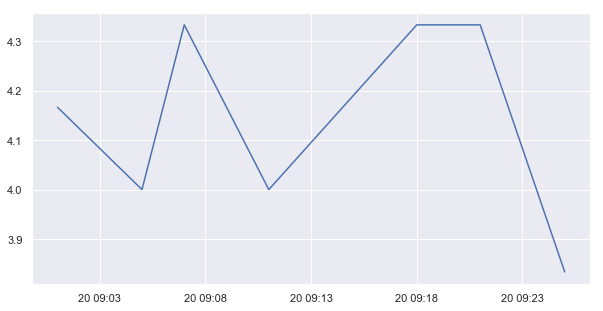

In [297]:
plt.plot(all_data['Timestamp'],all_data['Perception'])
plt.rcParams['figure.figsize'] = [10, 5]

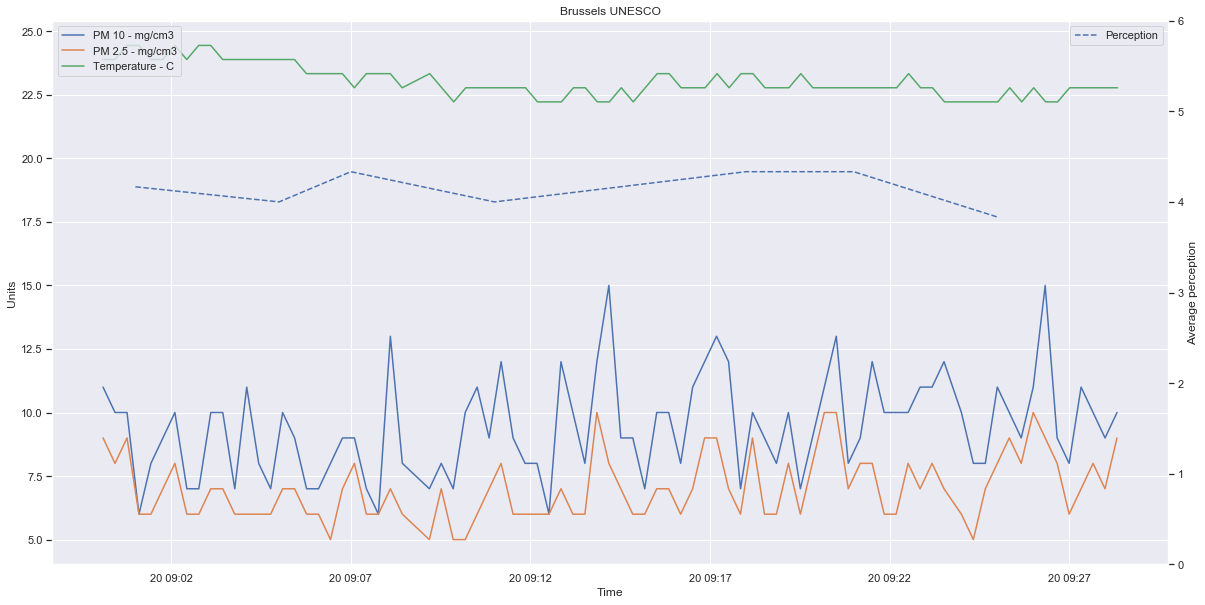

In [299]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax2.grid(False)
ax1.plot(data[0].Timestamp[::20],data[0].Value[::20], label = "PM 10 - mg/cm3")
ax1.plot(data[3].Timestamp[::20],data[3].Value[::20], label = "PM 2.5 - mg/cm3")
ax1.plot(data[2].Timestamp[::20],((data[2].Value[::20]-32)*5)/9, label = "Temperature - C")
ax2.plot(all_data['Timestamp'],all_data['Perception'], label = 'Perception', linestyle = '--')
ax1.set_xlabel('Time')
ax1.set_ylabel('Units')
ax2.set_ylabel('Average perception')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.rcParams['figure.figsize'] = [20, 10]
plt.ylim(0,6)
plt.title("Brussels UNESCO")

## Macclesfield

Replicate once more

In [300]:
filenames = os.listdir('macclesfield_data/airbeam_data/')

for i in range(len(filenames)):
    filenames[i] = "macclesfield_data/airbeam_data/" + filenames[i]
    
data = [pd.read_csv(filename, header = 2) for filename in filenames]

for i in range(len(filenames)):
    data[i]["Timestamp"] = pd.to_datetime(data[i].Timestamp)

In [301]:
filenames

['macclesfield_data/airbeam_data/Macclesfield - PM10.csv',
 'macclesfield_data/airbeam_data/Macclesfield - PM2.5.csv',
 'macclesfield_data/airbeam_data/Macclesfield - Temperature.csv',
 'macclesfield_data/airbeam_data/Macclesfield - PM1.csv',
 'macclesfield_data/airbeam_data/Macclesfield - Humidity.csv']

In [302]:
data_temp = data[0]

data_temp["Timestamp"].min()
data_temp["Timestamp"].max()

x = np.linspace(0, len(data_temp), len(data_temp))


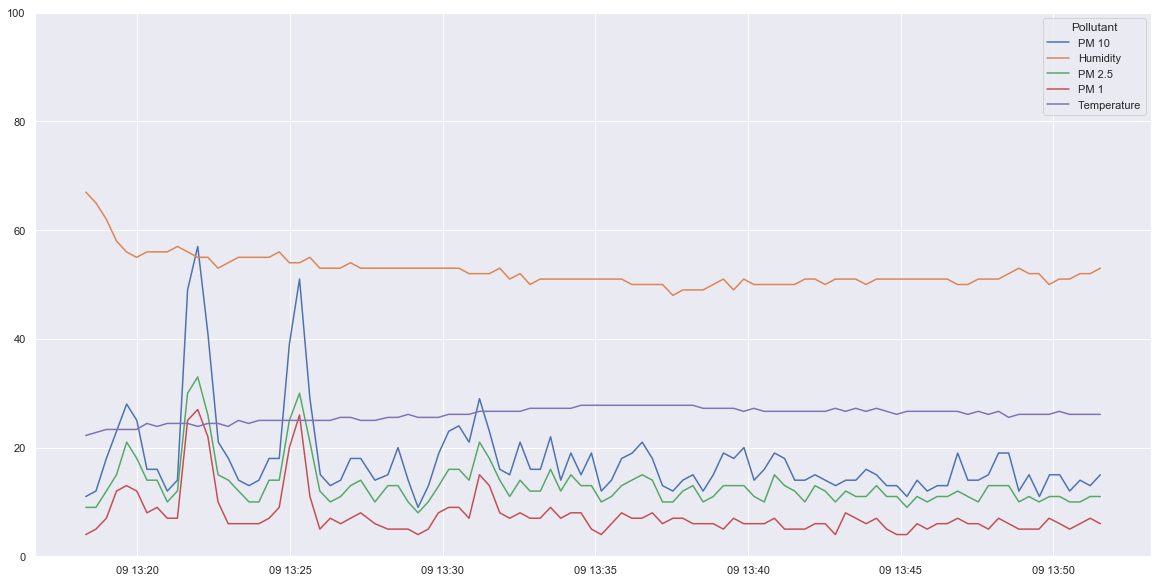

In [311]:
plt.plot(data[0].Timestamp[::20],data[0].Value[::20], label = "PM 10")
plt.plot(data[4].Timestamp[::20],data[4].Value[::20], label = "Humidity")
plt.plot(data[1].Timestamp[::20],data[1].Value[::20], label = "PM 2.5")
plt.plot(data[3].Timestamp[::20],data[3].Value[::20], label = "PM 1")
plt.plot(data[2].Timestamp[::20],((data[2].Value[::20]-32)*5)/9, label = "Temperature")
plt.legend(title="Pollutant", loc="upper right")
plt.yscale('linear')
axes = plt.gca()
axes.set_ylim([0,100])
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()
pylab.savefig('example.png', dpi=200 , bbox_inches = 'tight')

In [304]:
all_data = pd.read_csv('macclesfield_data/macclesfield_alldevices.csv')
all_data["Timestamp"] = pd.to_datetime(all_data['Timestamp'], format = '%y-%m-%d %H:%M')

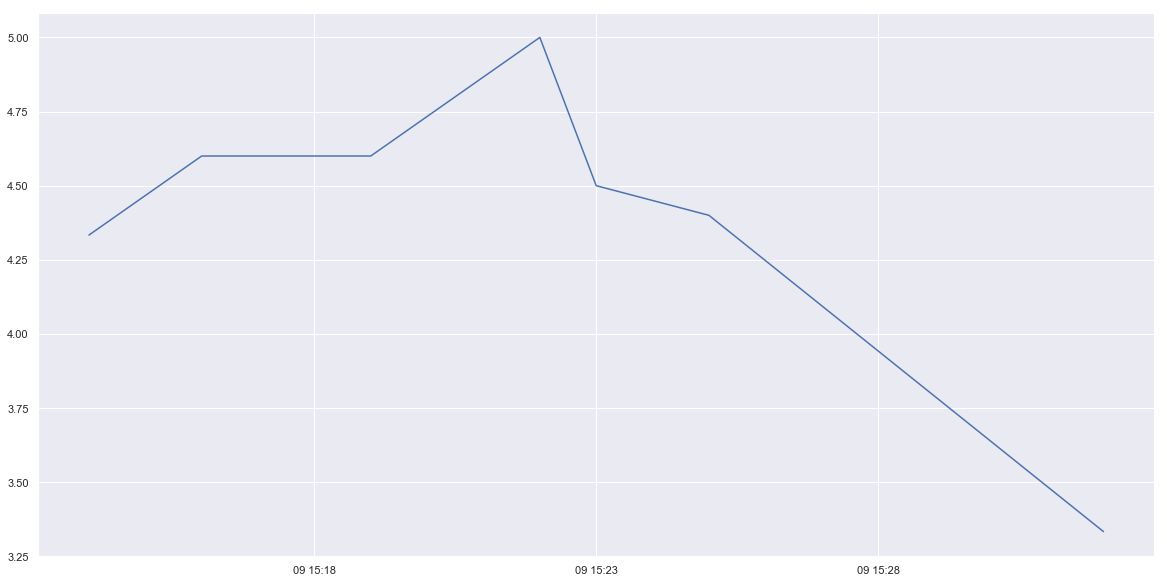

In [305]:
plt.plot(all_data['Timestamp'],all_data['Perception'])
plt.rcParams['figure.figsize'] = [20, 10]

In [306]:
all_data.Timestamp = all_data.Timestamp + pd.DateOffset(hours = -1, minutes = -56)

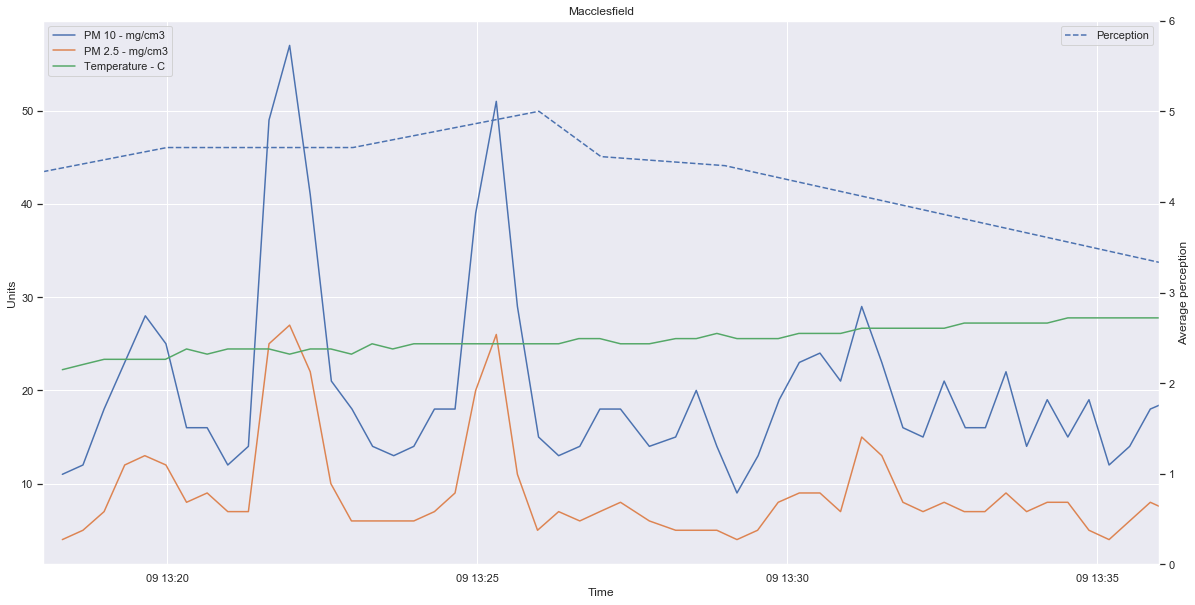

In [307]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax2.grid(False)
ax1.plot(data[0].Timestamp[::20],data[0].Value[::20], label = "PM 10 - mg/cm3")
ax1.plot(data[3].Timestamp[::20],data[3].Value[::20], label = "PM 2.5 - mg/cm3")
ax1.plot(data[2].Timestamp[::20],((data[2].Value[::20]-32)*5)/9, label = "Temperature - C")
ax2.plot(all_data['Timestamp'],all_data['Perception'], label = 'Perception', linestyle = '--')
ax1.set_xlabel('Time')
ax1.set_ylabel('Units')
ax2.set_ylabel('Average perception')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.xlim(all_data.Timestamp.min(),all_data.Timestamp.max())
plt.ylim(0,6)
plt.title("Macclesfield")
pylab.savefig('macclesfield.png', dpi=200 , bbox_inches = 'tight')

Maybe now we can see how everyone measured compared to one another

In [308]:
all_data_ = pd.read_csv('macclesfield_data/macclesfield_all.csv')

In [309]:
all_data_.head()

,Unnamed: 0,Device,Location,geo:long,Timestamp,geo:lat,Perception
0,0,Device 3,0,-2.119585,18-06-09 15:11,53.251899,4
1,0,Device 19,0,-2.119863,18-06-09 15:11,53.251870,4
2,0,Device 4,0,-2.119802,18-06-09 15:11,53.251920,4
3,0,Device 9,0,-2.119790,18-06-09 15:11,53.251847,5
4,0,Device 13,0,-2.120547,18-06-09 15:13,53.252016,5


Testing some plots to see if we have enough data

In [252]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)

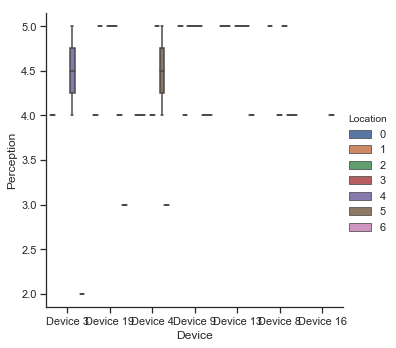

In [266]:
sns.catplot(x="Device", y="Perception", hue = 'Location', kind="box", data=all_data_);